In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_pickle('analysis_dataset.pickle')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
df

,date,gameno,visitor,v_team,v_team_run_total,v_money_line_close,v_money_line_open,v_run_line_close,v_run_line_odds_close,v_pitcher,v_rot,v_run_dif_game,home,h_team,h_team_run_total,h_money_line_close,h_money_line_open,h_run_line_close,h_run_line_odds_close,h_pitcher,h_rot,h_run_dif_game,total_runs_game,over_line_close,over_line_open,over_odds_close,over_odds_open,under_line_close,under_line_open,under_odds_close,under_odds_open,bet_outcomes,portfolio_value
0,1.270354e+09,0,V,NYY,7.0,107.0,104,NaN,NaN,CSABATHIA-L,931,-2.0,H,BOS,9.0,-117.0,-114,NaN,NaN,JBECKETT-R,932,2.0,16.0,9.0,9.0,-105,-116,9.0,9.0,-115,-104,1.050000,105.000000
1,1.270440e+09,1,V,PHI,11.0,-200.0,-200,NaN,NaN,RHALLADAY-R,901,10.0,H,WAS,1.0,175.0,175,NaN,NaN,JLANNAN-L,902,-10.0,12.0,7.5,7.5,-125,100,7.5,7.5,105,-120,0.800000,185.000000
2,1.270440e+09,2,V,MIA,1.0,-102.0,105,NaN,NaN,JJOHNSON-R,903,-6.0,H,NYM,7.0,-108.0,-115,NaN,NaN,JOSANTANA-L,904,6.0,8.0,7.0,7.0,-130,-125,7.0,7.0,110,105,0.769231,261.923077
3,1.270440e+09,3,V,STL,11.0,-143.0,-155,NaN,NaN,CARPENTER-R,905,5.0,H,CIN,6.0,128.0,140,NaN,NaN,AHARANG-R,906,-5.0,17.0,7.5,7.5,-105,-105,7.5,7.5,-115,-115,1.050000,366.923077
4,1.270440e+09,4,V,LAD,5.0,-126.0,-155,NaN,NaN,VPADILLA-R,907,-6.0,H,PIT,11.0,111.0,140,NaN,NaN,ZDUKE-L,908,6.0,16.0,8.5,8.5,-120,-110,8.5,8.5,100,-110,0.833333,450.256410
5,1.270440e+09,5,V,COL,5.0,-105.0,110,NaN,NaN,UJIMENEZ-R,909,2.0,H,MIL,3.0,-105.0,-125,NaN,NaN,YGALLARDO-R,910,-2.0,8.0,7.5,7.5,105,-105,7.5,7.5,-125,-115,1.050000,555.256410
6,1.270440e+09,6,V,CHC,5.0,110.0,115,NaN,NaN,CZAMBRANO-R,911,-11.0,H,ATL,16.0,-125.0,-130,NaN,NaN,DLOWE-R,912,11.0,21.0,8.5,8.5,100,-110,8.5,8.5,-120,-110,1.000000,655.256410
7,1.270440e+09,7,V,SD,3.0,166.0,155,NaN,NaN,JGARLAND-R,913,-3.0,H,ARI,6.0,-186.0,-175,NaN,NaN,DHAREN-R,914,3.0,9.0,8.0,8.0,-120,-110,8.0,8.0,100,-110,0.833333,738.589744
8,1.270440e+09,8,V,SF,5.0,-147.0,-130,NaN,NaN,TLINCECUM-R,915,3.0,H,HOU,2.0,132.0,115,NaN,NaN,ROSWALT-R,916,-3.0,7.0,7.0,7.5,-110,105,7.0,7.5,-110,-125,0.000000,738.589744
9,1.270440e+09,9,V,CLE,0.0,127.0,150,NaN,NaN,WESTBROOK-R,917,-6.0,H,CWS,6.0,-142.0,-170,NaN,NaN,MBUEHRLE-L,918,6.0,6.0,9.0,9.0,-105,-105,9.0,9.0,-115,-115,-1.000000,638.589744


In [5]:
x = df['bet_outcomes'].std()

In [6]:
x

0.9630524555931642

In [11]:
sharpe_ratio = df['bet_outcomes'] / x
sharpe_ratio.mean()

-0.029490844701178232

In [8]:
normalized = sharpe_ratio * (3**0.5)
normalized
df['sharpe_ratio'] = normalized

In [9]:
len(df['date'].unique())

1836

In [10]:
df['sharpe_ratio'].mean()

-0.05107964138056404

In [13]:
df_ml_dog = df.loc[df['h_money_line_close'] > 0]

In [14]:
df_ml_dog

,date,gameno,visitor,v_team,v_team_run_total,v_money_line_close,v_money_line_open,v_run_line_close,v_run_line_odds_close,v_pitcher,v_rot,v_run_dif_game,home,h_team,h_team_run_total,h_money_line_close,h_money_line_open,h_run_line_close,h_run_line_odds_close,h_pitcher,h_rot,h_run_dif_game,total_runs_game,over_line_close,over_line_open,over_odds_close,over_odds_open,under_line_close,under_line_open,under_odds_close,under_odds_open,bet_outcomes,portfolio_value,sharpe_ratio
1,1.270440e+09,1,V,PHI,11.0,-200.0,-200,NaN,NaN,RHALLADAY-R,901,10.0,H,WAS,1.0,175.0,175,NaN,NaN,JLANNAN-L,902,-10.0,12.0,7.5,7.5,-125,100,7.5,7.5,105,-120,0.800000,185.000000,1.438801
3,1.270440e+09,3,V,STL,11.0,-143.0,-155,NaN,NaN,CARPENTER-R,905,5.0,H,CIN,6.0,128.0,140,NaN,NaN,AHARANG-R,906,-5.0,17.0,7.5,7.5,-105,-105,7.5,7.5,-115,-115,1.050000,366.923077,1.888426
4,1.270440e+09,4,V,LAD,5.0,-126.0,-155,NaN,NaN,VPADILLA-R,907,-6.0,H,PIT,11.0,111.0,140,NaN,NaN,ZDUKE-L,908,6.0,16.0,8.5,8.5,-120,-110,8.5,8.5,100,-110,0.833333,450.256410,1.498751
8,1.270440e+09,8,V,SF,5.0,-147.0,-130,NaN,NaN,TLINCECUM-R,915,3.0,H,HOU,2.0,132.0,115,NaN,NaN,ROSWALT-R,916,-3.0,7.0,7.0,7.5,-110,105,7.0,7.5,-110,-125,0.000000,738.589744,0.000000
13,1.270440e+09,13,V,SEA,5.0,-152.0,-125,NaN,NaN,FHERNANDZ-R,925,2.0,H,OAK,3.0,137.0,110,NaN,NaN,BSHEETS-R,926,-2.0,8.0,7.0,7.0,-115,-115,7.0,7.0,-105,-105,0.869565,907.469342,1.563914
21,1.270613e+09,21,V,COL,4.0,-114.0,-105,NaN,NaN,ACOOK-R,901,-1.0,H,MIL,5.0,104.0,-105,NaN,NaN,DDAVIS-L,902,1.0,9.0,9.0,9.0,100,-105,9.0,9.0,-120,-115,0.000000,617.469342,0.000000
22,1.270613e+09,22,V,SF,10.0,-134.0,-130,NaN,NaN,MCAIN-R,903,6.0,H,HOU,4.0,119.0,115,NaN,NaN,BMYERS-R,904,-6.0,14.0,7.5,7.5,105,-105,7.5,7.5,-125,-115,1.050000,722.469342,1.888426
23,1.270613e+09,23,V,LAD,3.0,-170.0,-132,NaN,NaN,CKERSHAW-L,905,-1.0,H,PIT,4.0,150.0,117,NaN,NaN,ROHLENDOR-R,906,1.0,7.0,8.0,8.0,-120,-110,8.0,8.0,100,-110,-1.000000,622.469342,-1.798501
24,1.270613e+09,24,V,PHI,8.0,-185.0,-157,NaN,NaN,CHAMELS-L,907,4.0,H,WAS,4.0,165.0,142,NaN,NaN,JMARQUIS-R,908,-4.0,12.0,9.0,9.0,-120,-105,9.0,9.0,100,-115,0.833333,705.802676,1.498751
26,1.270613e+09,26,V,STL,6.0,-144.0,-125,NaN,NaN,WAINWRIGHT-R,911,3.0,H,CIN,3.0,129.0,110,NaN,NaN,JCUETO-R,912,-3.0,9.0,8.0,8.0,-130,-110,8.0,8.0,110,-110,0.769231,682.725753,1.383462


In [17]:
x = df_ml_dog['h_money_line_close'].unique()

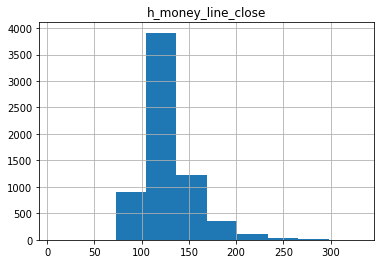

In [25]:
y = df_ml_dog.hist(column='h_money_line_close')